# Practical Task #9: Dimensionality Reduction (Tasks 1 and 2)

### Learning Outcomes:

In the current unit, we studied the Principal Component Analysis (PCA) algorithm for reducing the dimensionality of a dataset. In this lab, we will deepen our understanding of the algorithm by implementing it and applying it to a test data set.

### Instructions:
Attached to the lab task on Blackboard is a data.csv. This dataset is generated according to the same scheme as the one shown in lectures.

-----------

## Task 1:

Familiarise yourself with the scikit-learn implementation of PCA which is documented here:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Start by fitting a PCA model to the data using the same number of components as you have explanatory variables.
Once you have done this, inspect the properties explained_variance_ratio_. 

#### Step 1: Import the necessary modules and the dataset.

In [1]:
import pandas as pd # We need this module to import the data
import numpy as np # We need this module to perform various mathematical functions.
import matplotlib.pyplot as plt # We need this module to plot graphs.
from sklearn.decomposition import PCA # Import PCA for the task.

# Import the data...
data = pd.read_csv("data.csv", names=["xi1", "xi2", "xi3", "xi4", "xi5"])

# Just check that the data is imported without corruption.
print("|| Data: " + str(data.shape) + " ||")

|| Data: (999, 5) ||


#### Step 2: Examine the dataset to determine number of explanatory variables (you can assume a similar structure to the lecture)

In [2]:
data.head()

,xi1,xi2,xi3,xi4,xi5
0,0,1,0.991435,-0.996748,0.117973
1,0,1,0.998749,-0.997186,0.004981
2,0,0,0.024506,-0.007594,0.027965
3,0,0,0.021835,-0.010698,0.086229
4,1,0,1.008531,1.002680,0.970221


In [3]:
data.describe() # Useful in this context due to us having so much data - we can see the range of the values in each columns...

,xi1,xi2,xi3,xi4,xi5
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.516517,0.510511,1.027260,0.005685,0.518121
std,0.499977,0.500140,0.698956,0.714932,0.508663
min,0.000000,0.000000,-0.025598,-1.038391,-0.271663
25%,0.000000,0.000000,0.981908,-0.977771,0.008635
50%,1.000000,1.000000,1.001338,-0.000452,0.805417
75%,1.000000,1.000000,1.980070,0.981913,1.003448
max,1.000000,1.000000,2.033373,1.026365,1.293435


#### Step 3: Fitting a PCA model to the data using the same number of components as you have explanatory variables.

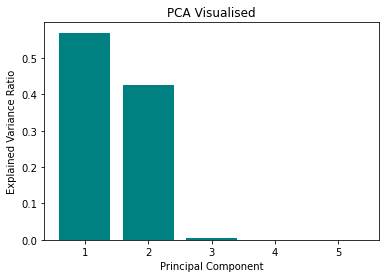

In [4]:
pca = PCA(n_components = 5) # Creating a PCA model using total variables (explanatory or not).
pca.fit(data) # Fit the data...

# Let's plot the explained_variance_ratio_ in a similar manner to the lecture slides...
plt.bar(range(1,6), pca.explained_variance_ratio_, color='teal') # Plot on the line graphs...
plt.title("PCA Visualised") # Show the title
plt.xlabel('Principal Component') # Show the x axis label
plt.ylabel('Explained Variance Ratio') # Show the y axis label
plt.xticks([1, 2, 3, 4, 5]) # Set the x axis range and values
plt.show() # Show the graph.

#### Discussion Point #1:


A1) What information does the bar chart give you?

#### Step 4: Once you have done this, inspect the properties explained_variance_ratio_. 

In [5]:
print(pca.explained_variance_ratio_) # Inspect the properties of explained_variance_ratio_

[5.69609167e-01 4.25986635e-01 4.36690016e-03 1.94195189e-05
 1.78776771e-05]


#### Discussion Point #2

B1) What does this tell you about the number of components you could use to explain the majority of the variance in the dataset?

#### Step 5: Inspect components...

In [6]:
print(pca.components_) # Inspect components_

[[-4.97997229e-01  4.07062087e-02 -4.56858664e-01 -5.38664206e-01
  -5.01460665e-01]
 [-3.44498095e-02 -5.75909539e-01 -6.10071476e-01  5.41720583e-01
  -3.86395873e-02]
 [-2.91255747e-01 -3.63384752e-03 -2.91186891e-01 -2.88662655e-01
   8.64315308e-01]
 [-4.06337390e-01 -7.07699434e-01  5.58264536e-01 -1.49629262e-01
  -1.79660978e-03]
 [ 7.07723099e-01 -4.07209423e-01 -1.50478761e-01 -5.57372979e-01
  -7.11818733e-05]]


#### Discussion Point #3

Now look at components_. <br />
C2) What do the components corresponding to high values of the explained variance ratios look like? <br />


#### Step 6: Use PCA to project the data down into 2D space 

The easiest way to do this is to fit a new PCA model with 2 components and using the model to transform the data.

In [7]:
pca = PCA(n_components = 2)             # Creating a PCA model using 2 components
new_data = pca.fit_transform(data)      # Fit and transform the data...
print("Shape of the new data is: " + str(new_data.shape))
new_data

Shape of the new data is: (999, 2)


array([[ 1.0341493 , -0.76982877],
       [ 1.08770487, -0.77016297],
       [ 0.94750671,  0.93529878],
       ...,
       [ 1.14995797, -0.76816074],
       [-1.00481846,  0.82247687],
       [ 1.04377674,  0.95828196]])

#### Step 7: Plot a scatter graph of the data

What you see should be close to the graph given in the lecture slides.

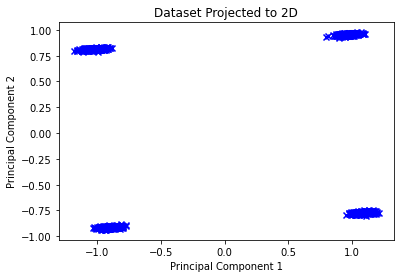

In [8]:
plt.scatter(new_data[:,0], new_data[:,1], color="blue", marker="x")
plt.title('Dataset Projected to 2D')
plt.xlabel('Principal Component 1') # Show the x axis label
plt.ylabel('Principal Component 2') # Show the y axis label
plt.show() # Show the graph

----------------

## Task 2: To further build up your understanding of PCA, you should now implement it. 

The PCA algorithm is given in the lecture slides and is fairly straightforward, but you will need to be careful about the alignment of your data. For this you can use the numpy library (you will need to make sure that your data is in a numpy array. If you have read the data in using the pandas function read_csv, then the values property of the result will be a numpy array). 

Functions of particular interest will be:
- _np.ndarray.mean(X,axis=0)_: This will give you the mean row value of matrix X.
- _np.subtract(X,v)_: If v is a vector of the same size as a row of X, this will subtract v from each row of X.
- _np.transpose(X)_: This calculates the transpose of a matrix X (i.e. 𝑿 to the power of 𝑇 in our lecture notes).
- _np.matmul(X,Y)_: This multiplies matrix X by matrix Y (i.e. 𝑿𝒀 in our lecture notes).
- _np.linalg.eig(X)_: This returns two values: the first being the eigenvalues of X and the second being the corresponding eigenvectors. Note that this will return columns of eigenvectors, not rows of them.


Take care at each step that your result has the dimensionality that you were expecting. For instance:
- the covariance matrix should be of size D by D, where D is the number of explanatory variables,
- the matrix of eigenvectors should also be of this size. You should have one eigenvalue for each eigenvector.


#### Step 8: Creating our own PCA using numpy.

Apply your function to the lab data. Your eigenvectors should be the same as the PCA components calculated during task 1. If you normalise the eigenvalues (i.e. divide the vector by the sum of its elements to give you a new vector with elements which sum to one), they should
match the explained variance ratio.

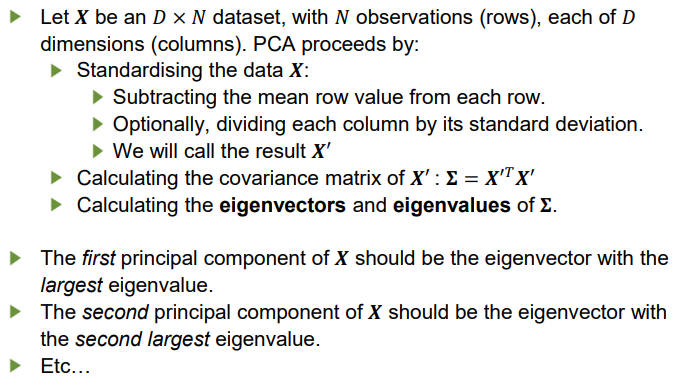